### 0. Simulate phone dataset (*)
We want to simulate data  (x,y)  to represent cost for phone subscriptions, with:

- x  - called minutes per month
- y  - SEK per month

  a) Use numpy.random.normal() to simulate a dataset with the following requirements:(*)

- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v.  X∼N(100,100) 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v.  ϵ∼N(0,50) 
- Let  y=2x+25+ϵ 
- plot the data set

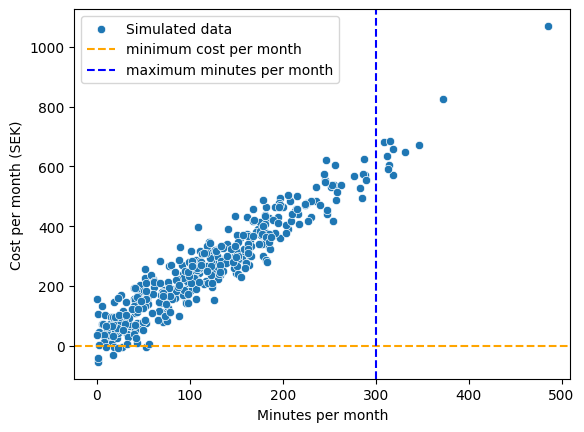

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

# X∼N(mu = 100, sigma = 100)
X = abs(np.random.normal(loc=100, scale=100, size=400))

# ϵ∼N(mu = 0, sigma = 50)
epsilon = np.random.normal(loc=0, scale=50, size=400)

# y = 2x + 25 + epsilon  --  x: predictor, feature, independent  -- y: response, dependent variable, prediction
# this is a simple linear regression bcz it has 1 predictor x1
# we have to train beta_0 and beta_1 so the line would fit the data points

beta_0 = 25  # intercept
beta_1 = 2  # slope
y = beta_1 * X + beta_0 + epsilon

sns.scatterplot(x=X, y=y, label="Simulated data")
plt.xlabel("Minutes per month")
plt.ylabel("Cost per month (SEK)")
plt.axhline(y=0, color="orange", linestyle="--", label='minimum cost per month')
plt.axvline(x=300, color="blue", linestyle="--", label='maximum minutes per month')
plt.legend()

In [15]:
# get the number of points x ≥ 300 min: 8
print("Number of points x ≥ 300 min:", len(X[X >= 300]))


Number of points x ≥ 300 min: 11


b) Now we want to remove some outliers according to this assumption: (*)

- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters  β0=25,β1=2

In [16]:
print("Min X:", X.min())
print("Max X:", X.max()) 

print("Min y:", y.min())
print("Max y:", y.max())

Min X: 0.25293646378088397
Max X: 485.2731490654721
Min y: -54.484386920295805
Max y: 1070.3485137054033


381 381


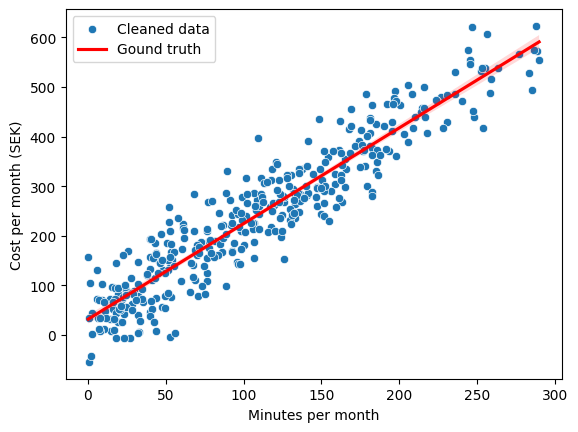

In [17]:
X_max = np.where(X > 300)
y_min = np.where(y < 0)

X = np.delete(X, X_max)
y = np.delete(y, X_max)

X = np.delete(X, y_min)
y = np.delete(y, y_min)

print(len(X), len(y))

sns.scatterplot(x=X, y=y, label="Cleaned data")
sns.regplot(x=X, y=y, scatter=False, color="red", label="Gound truth") 
plt.xlabel("Minutes per month")
plt.ylabel("Cost per month (SEK)")
plt.legend()

c) Insert the values into a DataFrame (*)

In [18]:
df = pd.DataFrame({'Minutes per month': X, 'Cost per month (SEK)': y})
df.head()

,Minutes per month,Cost per month (SEK)
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
